In [1]:
!unzip -n "/workspace/colab/multi.zip" -d "/workspace/colab/multi"

Archive:  /workspace/colab/multi.zip


In [3]:
from keras.utils import load_img
from keras.utils import img_to_array
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
EPOCHS = 300
BATCH_SIZE = 50
IMG_HEIGHT = 150
IMG_WIDTH = 150

train_dir ="/workspace/colab/multi/multi/train"
valid_dir = "/workspace/colab/multi/multi/validation"

train_datagen=ImageDataGenerator(rescale=1./255.0,rotation_range=40,width_shift_range=0.3,height_shift_range=0.3,zoom_range=0.2,horizontal_flip=True)
valid_datagen=ImageDataGenerator(rescale=1./255.0)

train_generator=train_datagen.flow_from_directory(train_dir,target_size=(IMG_HEIGHT,IMG_WIDTH),batch_size=BATCH_SIZE,class_mode='binary')
valid_generator=valid_datagen.flow_from_directory(valid_dir,target_size=(IMG_HEIGHT,IMG_WIDTH),batch_size=BATCH_SIZE,class_mode='binary')


train_num = train_generator.samples
valid_num = valid_generator.samples

Found 300 images belonging to 4 classes.
Found 60 images belonging to 4 classes.


In [4]:
img=load_img('/workspace/colab/multi/multi/train/mouse/mouse(1).jpg')

data=img_to_array(img)
img_data=np.expand_dims(data,axis=0)
sample_datagen=ImageDataGenerator(horizontal_flip=True,vertical_flip=True)
train_sample_iter=sample_datagen.flow(img_data,batch_size=1)

In [5]:
print(img_data.shape)
print(data.shape)

(1, 3024, 4032, 3)
(3024, 4032, 3)


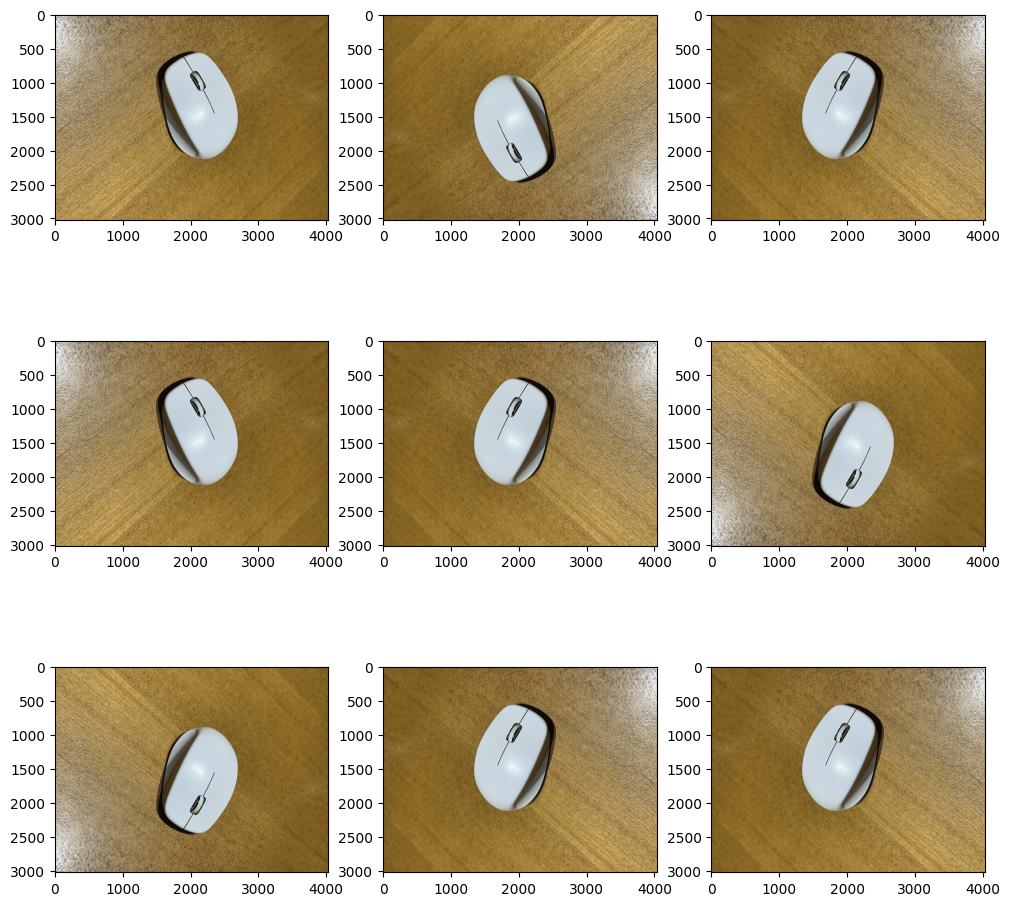

In [6]:
fig=plt.figure(figsize=(12,12))
for i in range(9):
    plt.subplot(3,3,i+1)
    batch=next(iter(train_sample_iter))
    image=batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

In [7]:
from keras import models
from keras import layers
from keras.applications import VGG16
VGG16_base=VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3))
VGG16_base.trainable=False
model=models.Sequential(name='multi_VGG16')
model.add(VGG16_base)
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='softmax',name='Output'))
model.add(layers.Dense(4,activation='softmax',name='FC_Layer2_Output'))
model.compile(loss='sparse_categorical_crossentropy',optimizer= 'adam',metrics='accuracy')
model.summary()

2022-12-18 15:05:31.855036: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-18 15:05:32.288918: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9650 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:19:00.0, compute capability: 7.5


Model: "multi_VGG16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 Output (Dense)              (None, 512)               4194816   
                                                                 
 FC_Layer2_Output (Dense)    (None, 4)                 2052      
                                                                 
Total params: 18,911,556
Trainable params: 4,196,868
Non-trainable params: 14,714,688
_________________________________________________________________


In [8]:
from keras.callbacks import EarlyStopping
ES_Callback = EarlyStopping(monitor='val_accuracy', patience=30)

history= model.fit(train_generator,steps_per_epoch=train_num//BATCH_SIZE, epochs=EPOCHS, validation_data=valid_generator,callbacks=[ES_Callback])


Epoch 1/300


2022-12-18 15:05:38.168825: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8600


6/6 [==============================] - 21s 3s/step - loss: 1.3666 - accuracy: 0.5933 - val_loss: 1.3231 - val_accuracy: 0.7667
Epoch 2/300
6/6 [==============================] - 17s 3s/step - loss: 1.3105 - accuracy: 0.8300 - val_loss: 1.2787 - val_accuracy: 0.8500
Epoch 3/300
6/6 [==============================] - 17s 3s/step - loss: 1.2819 - accuracy: 0.8467 - val_loss: 1.2612 - val_accuracy: 0.9167
Epoch 4/300
6/6 [==============================] - 18s 3s/step - loss: 1.2619 - accuracy: 0.8800 - val_loss: 1.2477 - val_accuracy: 0.9833
Epoch 5/300
6/6 [==============================] - 17s 3s/step - loss: 1.2470 - accuracy: 0.9200 - val_loss: 1.2342 - val_accuracy: 0.9833
Epoch 6/300
6/6 [==============================] - 18s 3s/step - loss: 1.2392 - accuracy: 0.9067 - val_loss: 1.2239 - val_accuracy: 1.0000
Epoch 7/300
6/6 [==============================] - 18s 3s/step - loss: 1.2292 - accuracy: 0.9467 - val_loss: 1.2111 - val_accuracy: 1.0000
Epoch 8/300
6/6 [======================

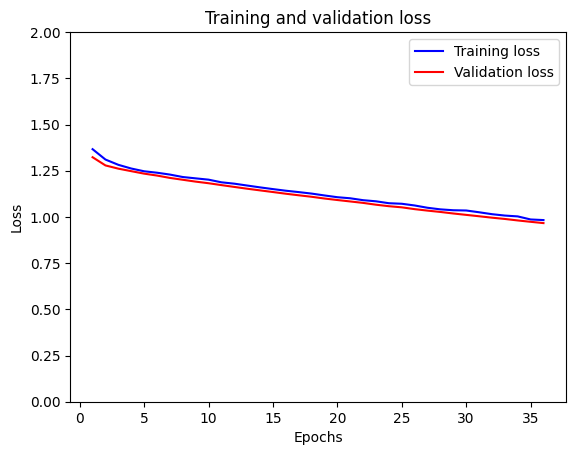

In [14]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.ylim([0, 2])
plt.show()

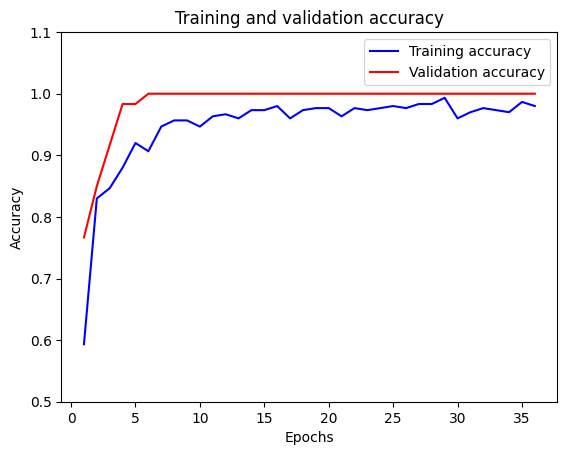

In [15]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim([0.5, 1.1])
plt.show()

In [148]:
test_dir="/workspace/colab/multi/multi/test"
test_datagen=ImageDataGenerator(rescale=1./255.0)
test_generator=test_datagen.flow_from_directory(test_dir,target_size=(150,150),color_mode="rgb",batch_size=10,class_mode='binary')
test_num=test_generator.samples

Found 43 images belonging to 4 classes.


In [149]:
import matplotlib.pyplot as plt
from keras.metrics import AUC
test_image,test_label=next(iter(test_generator))
model.evaluate(test_image,test_label)
test_pred=model.predict(test_image)
predicted = test_pred.argmax(axis=-1)


1/1 [==============================] - 0s 18ms/step


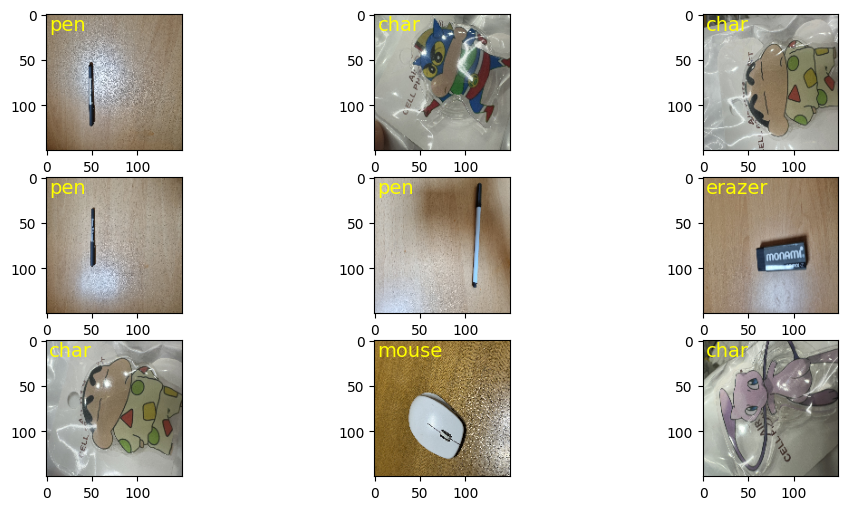

In [150]:
class_names=['char','erazer','mouse','pen']
fig =plt.figure(figsize=(12,6))
for i in range(9):
    ax=fig.add_subplot(3,3,i+1)
    ax.imshow(test_image[i,:],cmap=plt.cm.gray_r)
    if predicted[i]==test_label[i]:
        ax.text(3,17,class_names[predicted[i]],color='yellow',fontsize=14)
    else:
        ax.text(3,17,class_names[predicted[i]],color='red',fontsize=14)